In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
df_rating = pd.read_csv("ratings.csv")
df_movie = pd.read_csv("movies.csv")
df = pd.merge(df_movie, df_rating)
df.head(10)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0,965705637
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5,1407618878
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27,3.0,962685262
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,5.0,850466616


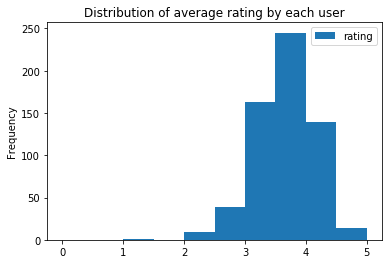

In [3]:
rating_user = df_rating.groupby(['userId'])[['rating']].mean()
rating_user.plot.hist(range=(0,5))
plt.title('Distribution of average rating by each user')
plt.show()

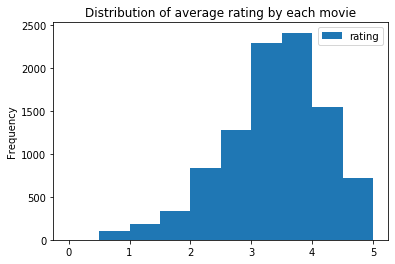

In [4]:
rating_movie = df_rating.groupby(['movieId'])[['rating']].mean()
rating_movie.plot.hist(range=(0, 5))
plt.title('Distribution of average rating by each movie')
plt.show()

In [66]:
df_pivot = df.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
df_new = df_pivot.fillna(0)

In [64]:
def cos_sim(a, b):
    """Takes 2 vectors a, b and returns the cosine similarity according
    to the definition of the dot product
    """
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b) 

In [67]:
cos_sim(df_new.loc[1], df_new.loc[3])

0.05972026184426368

In [10]:
def pearson(x, y):
    return cos_sim(x - np.mean(x), x - np.mean(y))

In [68]:
pearson(df_new.loc[1], df_new.loc[3])

0.9904302049568393

In [50]:
def retro_dictify(frame):
    d = {}
    for row in frame.values:
        here = d
        for elem in row[:-2]:
            if elem not in here:
                here[elem] = {}
            here = here[elem]
        here[row[-2]] = row[-1]
    return d